In [2]:
from scipy.integrate import quadrature as quad
from numpy import sin, pi, exp, vectorize
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def f(x):
    return (1-x)*(x+3) - sin(pi*x) + 4*x - 1

def prod(x, n):
    return f(x)*sin(n*pi*x)

def f_2(x,n):
    return x**2 * sin(n*pi*x)

def f_3(x,n):
    return x*sin(n*pi*x)

def f_4(x,n):
        return sin(n*pi*x)

def g_2(n):
    return (-1)**(n+1)/(n*pi) + 2*(-1)**n/(n**3 * pi**3) - 2/(n**3 * pi**3)

def g_3(n):
    return (-1)**(n+1)/(n*pi)

def g_4(n):
    return (1 + (-1)**(n+1))/(n*pi)

def b_n(n):
    ret = -2*g_2(n) + 4*g_3(n) + 4*g_4(n)
    if n==1:
        return ret - 1
    else:
        return ret
    
def b_even(n):
    assert n%2 == 0
    return -2/(n*pi)

def b_odd(n):
    assert n%2 == 1
    return 10/(n*pi) + 8/(n*pi)**3

In [25]:
f(2.1)

-2.9190169943749478

In [35]:
g_4(5)

0.12732395447351627

In [43]:
quad(f_4, 0, 1 ,args=(5))



(0.12732395422686163, 8.622163316651665e-09)

In [52]:
2*quad(prod, 0, 1, args=(1))[0]

2.4411111373907453

In [45]:
10/pi + 8/pi**3 - 1

2.441111137303503

In [60]:
b_n(3) - b_odd(3)

0.0

In [61]:
b_n(3)

1.0705889641483983

In [81]:
for i in range(1, 20):
    print(2*quad(prod, 0, 1, args=(i))[0] - b_n(i))

8.72422134534645e-11
4.046207813246383e-12
7.566147708359949e-11
-2.635739404510673e-10
-4.838826006547947e-10
-4.7743767273011883e-11
1.1533581312228591e-09
1.4812566451194442e-10
-1.7096730142718286e-09
-2.755423111899802e-10
1.937068838664402e-09
3.831515868468749e-10
-1.8540128043920134e-09
-4.437707215587672e-10
1.5829907940023702e-09
4.5452860225614344e-10
-1.2449393183011637e-09
-4.268106215676859e-10
9.19784554076486e-10


In [66]:
for i in range(1,40):
    print(b_n(i))

2.441111137303503
-0.3183098861837907
1.0705889641483983
-0.15915494309189535
0.6386838705713062
-0.1061032953945969
0.4554806312114374
-0.07957747154594767
0.3540315776191167
-0.06366197723675814
0.28956647224481774
-0.05305164769729845
0.24497119705328713
-0.04547284088339867
0.21228303887081323
-0.039788735772973836
0.1872936257575047
-0.0353677651315323
0.16756913564644263
-0.03183098861837907
0.1516039963660493
-0.028937262380344612
0.13841680859601532
-0.026525823848649224
0.12734046725914608
-0.024485375860291588
0.11790565882006299
-0.022736420441699334
0.10977260876137379
-0.02122065907891938
0.10268926919209474
-0.019894367886486918
0.09646472083971802
-0.018724110951987685
0.09095169954581694
-0.01768388256576615
0.0860347926900985
-0.016753151904410037
0.08162226910654127


In [6]:
def u(x,t,n):
    ret = sin(pi*x) - 4*x + 1
    for i in range(1,n+1):
        ret += b_n(i)*sin(i*pi*x)*exp(-1*(i*pi)**2*t)
    return ret
u = vectorize(u)

In [7]:
u(.5, 10, 20)

array(3.34533992e-43)

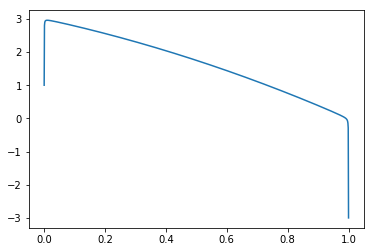

In [8]:
x = np.linspace(0,1, 1000)
y = u(x, 0, 2000)
plt.plot(x,y)

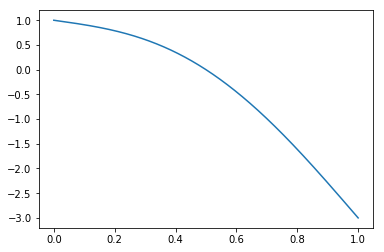

In [38]:
x = np.linspace(0,1, 1000)
y = u(x, 0.0005, 0)
plt.plot(x,y)

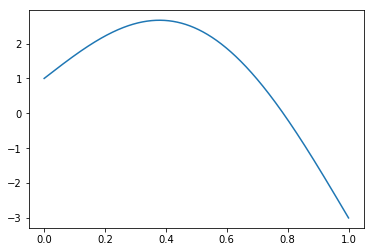

In [49]:
x = np.linspace(0,1, 1000)
y = u(x, 0.0005, 1)
plt.plot(x,y)

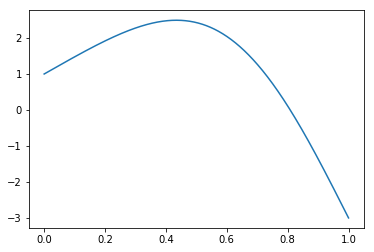

In [50]:
x = np.linspace(0,1, 1000)
y = u(x, 0.0005, 2)
plt.plot(x,y)

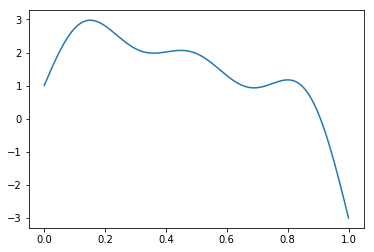

In [41]:
x = np.linspace(0,1, 1000)
y = u(x, 0.0005, 5)
plt.plot(x,y)

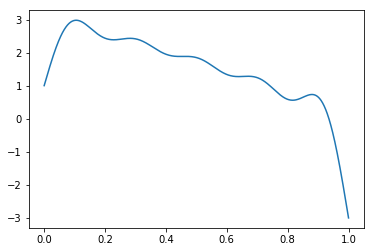

In [43]:
x = np.linspace(0,1, 1000)
y = u(x, .0005, 10)
plt.plot(x,y)

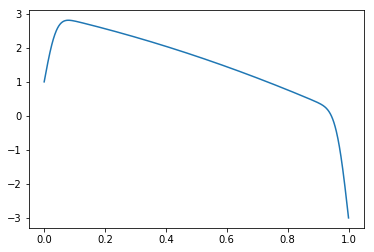

In [44]:
x = np.linspace(0,1, 1000)
y = u(x, .0005, 1000)
plt.plot(x,y)

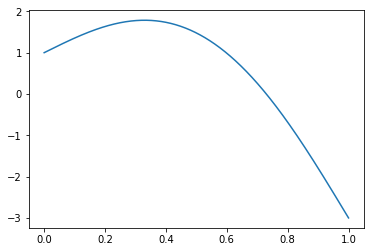

In [15]:
x = np.linspace(0,1, 1000)
y = u(x, .05, 3)
plt.plot(x,y)

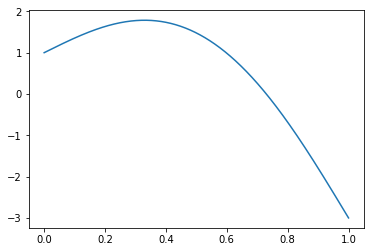

In [16]:
x = np.linspace(0,1, 1000)
y = u(x, .05, 10)
plt.plot(x,y)

In [17]:
X, T = np.meshgrid(np.linspace(0,1,100), np.linspace(0, 1,500))

<a list of 7 text.Text objects>

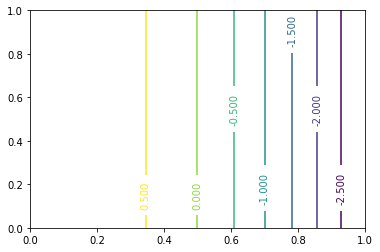

In [29]:
X, T = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,100))
U = u(X,T,0)
CS = plt.contour(X, T = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,100))

<a list of 7 text.Text objects>

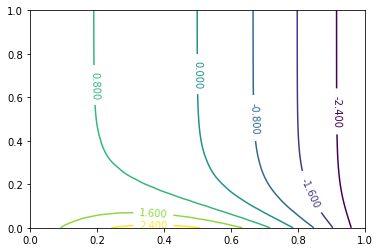

In [30]:
X, T = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,100))
U = u(X,T,1)
CS = plt.contour(X,T,U)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 7 text.Text objects>

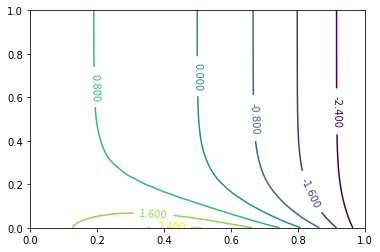

In [31]:
X, T = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,100))
U = u(X,T,2)
CS = plt.contour(X,T,U)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 7 text.Text objects>

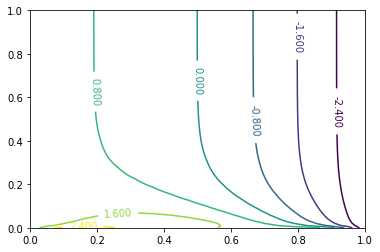

In [32]:
X, T = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,100))
U = u(X,T,5)
CS = plt.contour(X,T,U)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 7 text.Text objects>

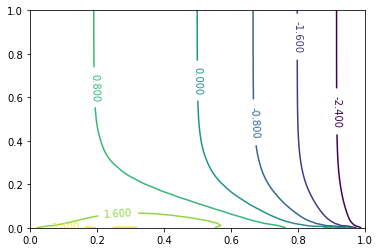

In [33]:
X, T = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,100))
U = u(X,T,10)
CS = plt.contour(X,T,U)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 7 text.Text objects>

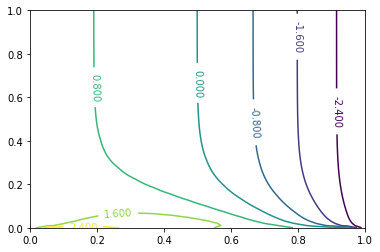

In [28]:
X, T = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,100))
U = u(X,T,200)
CS = plt.contour(X,T,U)
plt.clabel(CS, inline=1, fontsize=10)

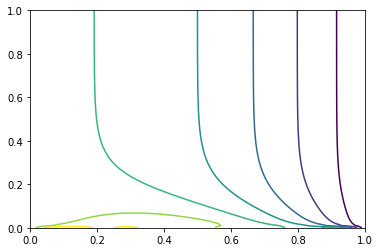

In [24]:
X, T = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
U = u(X,T,10)
CS = plt.contour(X,T,U)
#CS.xlabel('x')
#CS.ylabel('t')

In [25]:
for i in range(1,11):
    print(b_n(i))

2.441111137303503
-0.3183098861837907
1.0705889641483983
-0.15915494309189535
0.6386838705713062
-0.1061032953945969
0.4554806312114374
-0.07957747154594767
0.3540315776191167
-0.06366197723675814
